<a href="https://colab.research.google.com/github/harshitadd/Celestini/blob/master/Modeltf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install joblib
import tensorflow as tf 
import pickle
from sklearn.externals import joblib
import numpy as np
from tensorflow.python.client import device_lib
from tensorflow.saved_model import simple_save
import random
import matplotlib.pyplot as plt 
import math

from sklearn.model_selection import train_test_split
from tensorflow.python import pywrap_tensorflow


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#FEATURES AND LABELS  


with open('/content/features_withITO (1).bin','rb') as file:
  temp = pickle.load(file)
  
  
with open('/content/labels_withITO (2).bin','rb') as file:
  l = pickle.load(file)

In [0]:
features =[]
for i in temp:
  features.append(list(i))

labels=[]  
for i in l:
  labels.append(list(i))

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
## 56 BIT (2253,3147)

# features = joblib.load('/content/features56.pkl')
# labels = joblib.load('/content/labels56.pkl')


In [0]:
## 64 BIT (2253,3147)

# features = joblib.load('/content/features64.pkl')
# labels = joblib.load('/content/labels64.pkl')


In [0]:
# # 32 BIT (2253,1035)

# features = joblib.load('/content/features32.pkl')
# labels = joblib.load('/content/labels32.pkl')

In [0]:
## TEST SET 

x_train_t, x_test_t,y_train_t, y_test_t = train_test_split(features, labels, test_size = 0.3)

In [0]:
tf.reset_default_graph()

In [62]:
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5920626892490842763
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 694842427357957988
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 8753849175344013415
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14892338381
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3004212435850716996
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [0]:

from keras.layers import Dense, Dropout, BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam
model = Sequential()
model.add(Dense(15, input_shape = (9, ), activation = 'relu'))
model.add(Dense(25, activation = 'relu'))
model.add(Dense(1,  activation = 'relu'))

In [64]:
model.compile(optimizer = Adam(lr = 0.001),loss='mse')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                150       
_________________________________________________________________
dense_2 (Dense)              (None, 25)                400       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 576
Trainable params: 576
Non-trainable params: 0
_________________________________________________________________


In [65]:
hist = model.fit([x_train_t], [y_train_t], validation_split = 0.33, epochs = 1000, verbose = 1, batch_size = 32, shuffle = True)

W0806 16:02:14.911203 140530293823360 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0806 16:02:14.993621 140530293823360 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 1114 samples, validate on 549 samples
Epoch 1/1000
1114/1114 [==============================] - 0s 341us/step - loss: 3136.5414 - val_loss: 3623.1212
Epoch 2/1000
1114/1114 [==============================] - 0s 99us/step - loss: 3008.6712 - val_loss: 3427.6719
Epoch 3/1000
1114/1114 [==============================] - 0s 102us/step - loss: 2736.1665 - val_loss: 3023.6587
Epoch 4/1000
1114/1114 [==============================] - 0s 98us/step - loss: 2248.5157 - val_loss: 2391.2061
Epoch 5/1000
1114/1114 [==============================] - 0s 103us/step - loss: 1620.1925 - val_loss: 1677.6857
Epoch 6/1000
1114/1114 [==============================] - 0s 105us/step - loss: 1052.4504 - val_loss: 1163.6728
Epoch 7/1000
1114/1114 [==============================] - 0s 104us/step - loss: 759.6254 - val_loss: 966.9229
Epoch 8/1000
1114/1114 [==============================] - 0s 106us/step - loss: 691.4833 - val_loss: 920.4528
Epoch 9/1000
1114/1114 [==============================] - 0s 10

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134917). Check your callbacks.
  % delta_t_median)


1114/1114 [==============================] - 0s 97us/step - loss: 442.8164 - val_loss: 597.1695
Epoch 183/1000
1114/1114 [==============================] - 0s 94us/step - loss: 441.2712 - val_loss: 592.9066
Epoch 184/1000
1114/1114 [==============================] - 0s 94us/step - loss: 440.9495 - val_loss: 589.1887
Epoch 185/1000
1114/1114 [==============================] - 0s 94us/step - loss: 438.1663 - val_loss: 590.8859
Epoch 186/1000
1114/1114 [==============================] - 0s 94us/step - loss: 437.3034 - val_loss: 590.7310
Epoch 187/1000
1114/1114 [==============================] - 0s 94us/step - loss: 435.5905 - val_loss: 583.6838
Epoch 188/1000
1114/1114 [==============================] - 0s 93us/step - loss: 433.7770 - val_loss: 588.0769
Epoch 189/1000
1114/1114 [==============================] - 0s 93us/step - loss: 433.2048 - val_loss: 584.9865
Epoch 190/1000
1114/1114 [==============================] - 0s 106us/step - loss: 431.0554 - val_loss: 580.6940
Epoch 191/1000


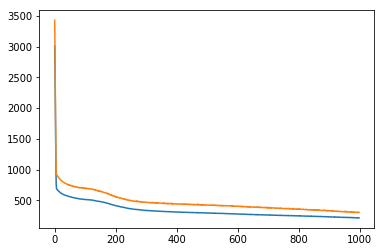

In [66]:
tr = hist.history['loss']
val_ls = hist.history['val_loss']
plt.plot(tr[1:])
plt.plot(val_ls[1:])

In [0]:
predicted = model.predict([x_test_t])


In [0]:
# print(np.shape(y_test_t))
##print(np.shape(predicted))

actual =[]
pred=[]
se=0
show = np.hstack((y_test_t, predicted))

for i in show:
  se+=(i[0]-i[1])**2
  actual.append(i[0])
  pred.append(i[1])
  
 




In [0]:
rmse = (se/np.size(y_test_t))**0.5

In [70]:
print(rmse)

15.423726140156969


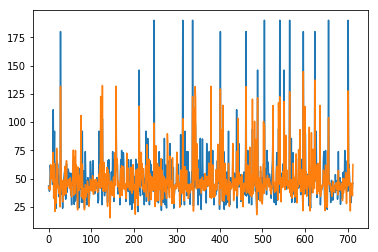

In [71]:
plt.plot(actual)
plt.plot(pred)

In [0]:
print(np.shape(labels))

(2376, 1)


In [0]:
tf.reset_default_graph()

In [0]:
x = tf.placeholder(shape = (None,9), dtype = tf.float32, name = 'input' )
y = tf.placeholder(shape = (None,1), dtype = tf.float32, name = 'target')

#Layer 1 
w1 = tf.Variable(tf.glorot_uniform_initializer(dtype = tf.float32)((9, 15)))
b1 = tf.Variable(tf.glorot_uniform_initializer(dtype = tf.float32)((1,15)))

#Layer2 

w2 = tf.Variable(tf.glorot_uniform_initializer(dtype = tf.float32)((15,25)))
b2 = tf.Variable(tf.glorot_uniform_initializer(dtype = tf.float32)((1,25)))

#out

wo = tf.Variable(tf.glorot_uniform_initializer(dtype = tf.float32)((25,1)))
bo = tf.Variable(tf.glorot_uniform_initializer(dtype = tf.float32)((1,1)))


In [0]:
hidl1 = tf.add(tf.matmul(x,w1),b1, name ='hidden1')
hidl1 = tf.nn.relu(hidl1)
hidl2 = tf.add(tf.matmul(hidl1,w2),b2, name = 'hidden2')
hidl2 = tf.nn.relu(hidl2)

In [0]:
#outl_batch = tf.compat.v1.layers.batch_normalization(hidl2)
out = tf.add(tf.matmul(hidl2,wo),bo,name = 'output')


In [0]:
loss = tf.reduce_mean(tf.square(tf.subtract(y,out))) 

opt = tf.train.AdamOptimizer(name = 'optimizer')
op_train = opt.minimize(loss, name ='train_op')

  

Add additional custom loss functions if necc 
reducing mean sqaure error 
1. reducing max deviation 

In [0]:
saved = tf.train.Saver().as_saver_def()

In [0]:
init = tf.global_variables_initializer()

In [0]:
train=[]
val=[]

with tf.device('/device:CPU:0'):
  update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
  save = tf.train.Saver()
  with tf.Session() as sess:
    sess.run(init)
    mini =[]
    for i in range(1500):
      b1=[]
      b2=[]
      l1=[]
      l2=[]
      b1_val=[]
      b2_val=[]
      l1_val=[]
      l2_val=[]
      x_traint, x_test_t,y_traint, y_test_t = train_test_split(features, labels, test_size = 0.3)
      x_trainv, x_testv, y_trainv, y_testv = train_test_split(x_traint, y_traint, test_size = 0.3)
      
      for j in range(16): ##One run is appending 2 random lists 
      
      #TRAINING MINI BATCHES 
        
        seed = random.choice(range(len(x_trainv)))
        i = random.choice(range(len(x_trainv)))
        
        b1.append(x_trainv[seed])
        b2.append(x_trainv[i])
        l1.append(y_trainv[seed])
        l2.append(y_trainv[i])
        
        x_batch = np.vstack((b1,b2))
        y_batch = np.vstack((l1,l2))
        
        ##VALIDATION MINI BATCHES 
        
        seed_val = random.choice(range(len(x_traint)))
        i_val = random.choice(range(len(x_traint)))
        
        b1_val.append(x_traint[seed_val])
        b2_val.append(x_traint[i_val])
        l1_val.append(y_traint[seed_val])
        l2_val.append(y_traint[i_val])
        
        x_batch_val = np.vstack((b1_val,b2_val))
        y_batch_val = np.vstack((l1_val,l2_val))
      
      ## TRAINING LOSS
      update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
      z= sess.run([loss,op_train, update_ops], feed_dict = {x : x_batch, y: y_batch })
      train.append(z[0])
      
      ##VALIDATION LOSS
      
      z_val= sess.run([loss], feed_dict = {x : x_batch_val, y: y_batch_val })
      val.append(z_val[0])
      
      print(str(z[0]) + '\t' + str(z_val[0]))
    
    plt.plot(train)
    plt.plot(val)
    save_path = save.save(sess, "/content/layer2_model.ckpt")
    print('Saved model!')
    
 

In [57]:
print(z)

[705.08997, None, []]


In [15]:
print(type(tf.get_default_graph().as_graph_def()))
tf.io.write_graph(tf.get_default_graph().as_graph_def(), '/content/', 'layer2_train.pbtxt')

<class 'tensorflow.core.framework.graph_pb2.GraphDef'>


'/content/final_train.pbtxt'

In [0]:
with open('/content/final_graph.pb', 'wb') as f:
  f.write(tf.get_default_graph().as_graph_def().SerializeToString())
  

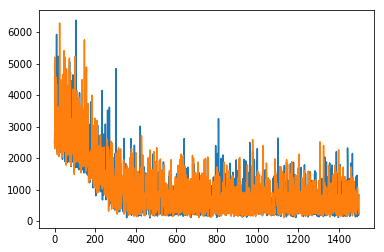

In [17]:
plt.plot(train[1:])
plt.plot(val[1:])

In [27]:
tf.trainable_variables()

[<tf.Variable 'Variable:0' shape=(9, 15) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(1, 15) dtype=float32_ref>,
 <tf.Variable 'Variable_2:0' shape=(15, 1) dtype=float32_ref>,
 <tf.Variable 'Variable_3:0' shape=(1, 1) dtype=float32_ref>,
 <tf.Variable 'batch_normalization/gamma:0' shape=(15,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization/beta:0' shape=(15,) dtype=float32_ref>]

In [0]:
## 48 BIT (2253,2315)
'''
features = joblib.load('/content/features48.pkl')
labels = joblib.load('/content/labels48.pkl')
'''

In [0]:
## 16 BIT (2253,267)
'''
features = joblib.load('/content/features16.pkl')
labels = joblib.load('/content/labels16.pkl')
'''